# Simple MNIST convnet

*Adapted from* **Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2015/06/19<br>
**Last modified:** 2020/04/21<br>
**Description:** A simple convnet that achieves ~99% test accuracy on MNIST.

## Setup

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
!pip install tensorflow

## Prepare the data

In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

In [4]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [6]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Visualization

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

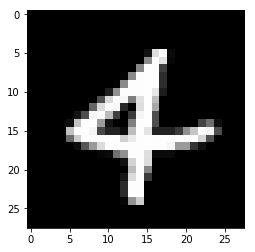

In [12]:
image = x_train[150,:,:,0]
# plot the sample
fig = plt.figure()
plt.imshow(image, cmap='gray')
plt.show()

## Build the model

CNN visualization click <a href='https://poloclub.github.io/cnn-explainer/'>here</a>

In [13]:
model = keras.Sequential(
    [
        layers.InputLayer(input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)    

## Train the model

In [14]:
batch_size = 1024
epochs = 3

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/3
54000/54000 [==============================] - 30s 551us/sample - loss: 1.1961 - acc: 0.6642 - val_loss: 0.2568 - val_acc: 0.9293
Epoch 2/3
54000/54000 [==============================] - 29s 541us/sample - loss: 0.2886 - acc: 0.9133 - val_loss: 0.1345 - val_acc: 0.9635
Epoch 3/3
54000/54000 [==============================] - 29s 531us/sample - loss: 0.1793 - acc: 0.9468 - val_loss: 0.0977 - val_acc: 0.9740


## Evaluate the trained model

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.10648889704048634
Test accuracy: 0.9701


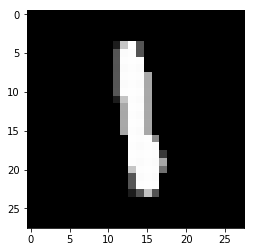

In [19]:
new_image = x_train[200,:,:,0]
# plot the sample
fig = plt.figure()
plt.imshow(new_image, cmap='gray')
plt.show()

In [21]:
output=model.predict(x_train[200:201])[0]
print(output)

[1.1370237e-05 9.9156958e-01 3.0820869e-04 1.2141139e-03 1.0139267e-03
 2.9508062e-04 4.4369313e-04 1.7201660e-04 4.8174537e-03 1.5474344e-04]


In [22]:
output.argmax()

1

In [24]:
x_train[200:201].shape

(1, 28, 28, 1)